# 1.1

In [1]:
import math

with open('input.txt', encoding='utf8') as f:
    content = f.readlines()

num = int(content[0].split(' = ')[1])
x = [float(i) for i in content[1].split(' ')]

print(num)


12200


In [2]:
import random

random.shuffle(x)


In [3]:
 np.var?

Object `np.var` not found.


In [4]:
class Sample(object):
    
    def __init__(self, values):
        self.values = values
    
    def mean(self):
        return st.tmean(self.values)
    
    def median(self):
        return np.median(self.values)

    def mid(self):
        return (min(self.values) + max(self.values)) / 2
    
    def mode(self):
        return st.mode(self.values)[0][0]
    
    def variance(self):
        return np.var(self.values)
    
    def std(self):
        return np.std(self.values)
    
    def moment(self, k):
        return st.moment(self.values, k)
    
    def skewness(self):
        return st.skew(self.values)
    
    def kurtosis(self):
        return st.kurtosis(self.values)
    
    def percentile(self, q):
        return np.percentile(self.values, q)
    
    def interval_mean(self, q):
        c = self.mean()
        s = self.std()
        n = len(self.values)
        df = (1 + q) / 2
        left = c - s / math.sqrt(n) * st.t.pdf(df, num - 1)
        right = c + s / math.sqrt(n) * st.t.pdf(df, num - 1)
        return (left, right)
    
    def interval_variance(self, q):
        s = self.std()
        n = len(self.values)
        left = (n - 1) * (s ** 2) / st.chi2.pdf((1+q)/2, num - 1)
        right = (n - 1) * (s ** 2) / st.chi2.pdf((1-q)/2, num - 1)
       # return (math.sqrt(left), math.sqrt(right))        
        return (left, right)   
        
    def __str__(self):
        return str(self.values)
    

In [5]:
samples = [Sample(x)]

samples_num = 10
for i in range(samples_num):
    start = int(i*num/10)
    end = int((i+1)*num/10)
    samples.append(Sample(x[start : end]))


# 1.2

In [6]:
num_bins = 20


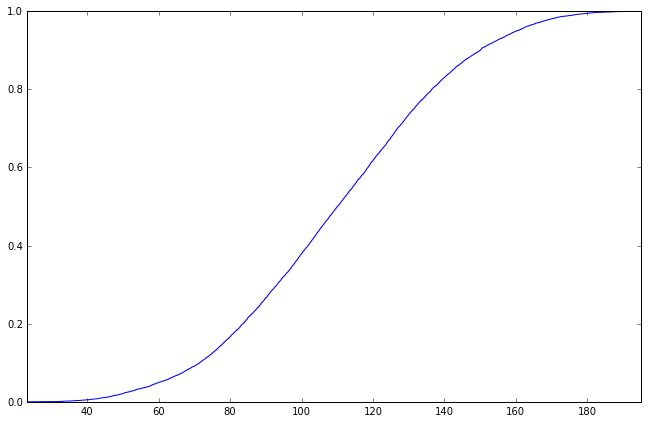

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

plt.figure(figsize=(11, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True)
plt.xlim([min(x), max(x)-1])
plt.show()


[   10.    55.   165.   277.   390.   627.   921.  1110.  1212.  1272.
  1233.  1271.  1102.   892.   648.   454.   330.   150.    63.    18.]


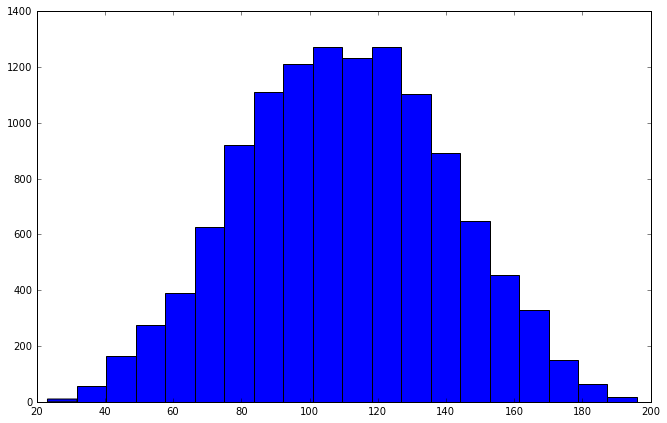

[   5.   11.   19.   36.   49.   75.  104.  107.  118.  116.  130.  112.
   87.   80.   62.   45.   38.   11.   13.    2.]


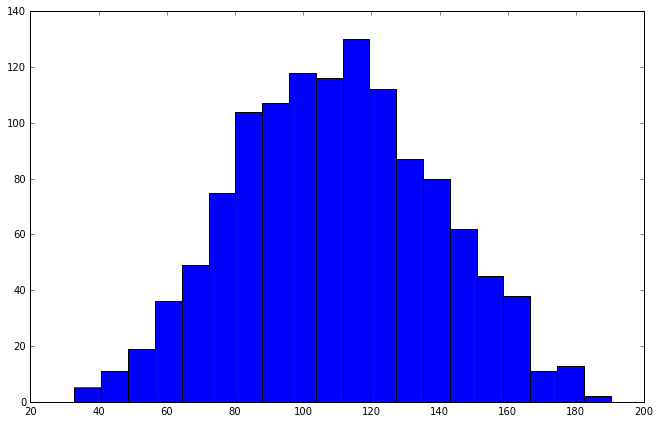

[   7.    7.   27.   48.   39.   67.  106.  106.  108.  106.  121.  114.
  108.   83.   53.   53.   30.   20.    9.    8.]


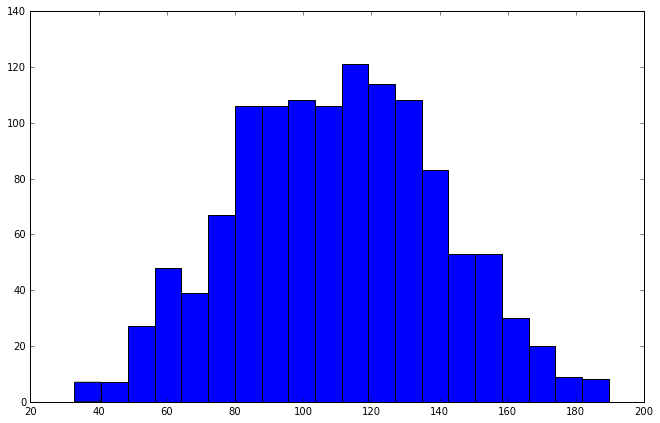

[   5.   15.   16.   32.   34.   70.   95.  110.  117.  124.  128.  126.
  100.   87.   58.   44.   32.   17.    7.    3.]


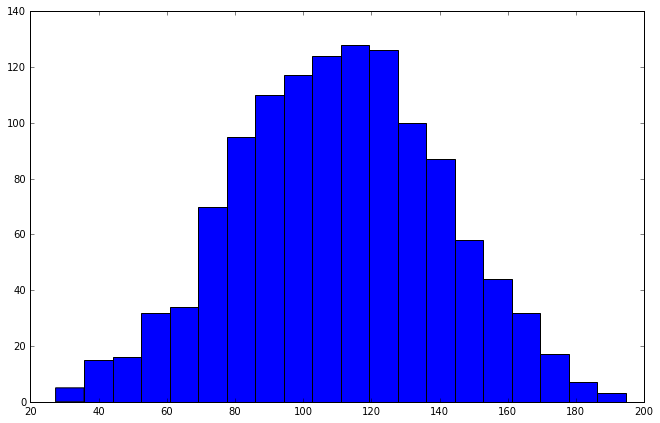

[   7.   14.   20.   39.   59.   72.   76.   97.  106.  120.  101.  108.
  112.   86.   56.   63.   45.   23.   13.    3.]


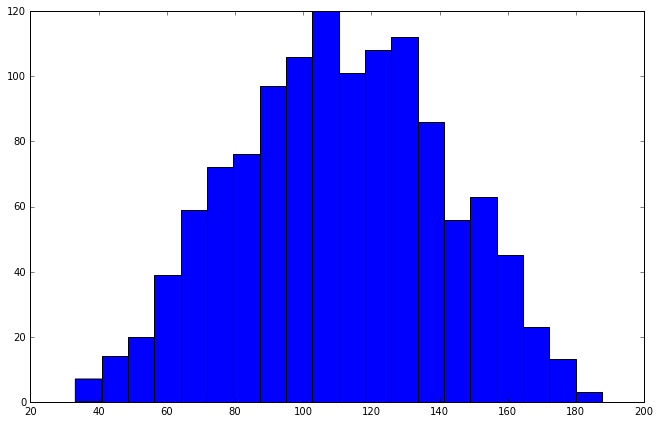

[   3.    7.   29.   30.   42.   83.   97.   97.  112.  139.  118.  133.
  101.   78.   53.   46.   33.   15.    3.    1.]


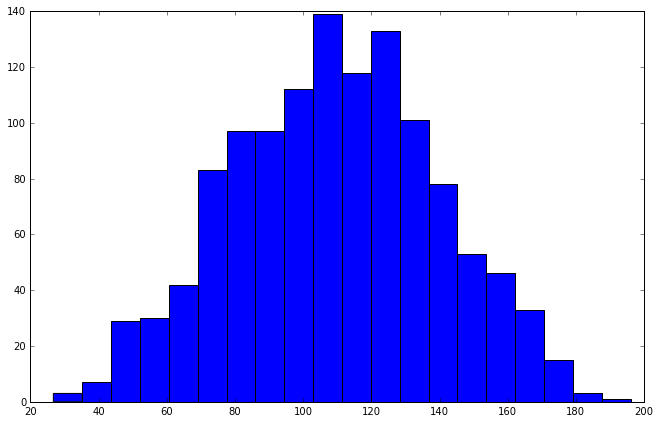

[   2.    7.   18.   24.   38.   58.   94.  100.  118.  127.  119.  112.
  105.   85.   86.   49.   36.   20.   15.    7.]


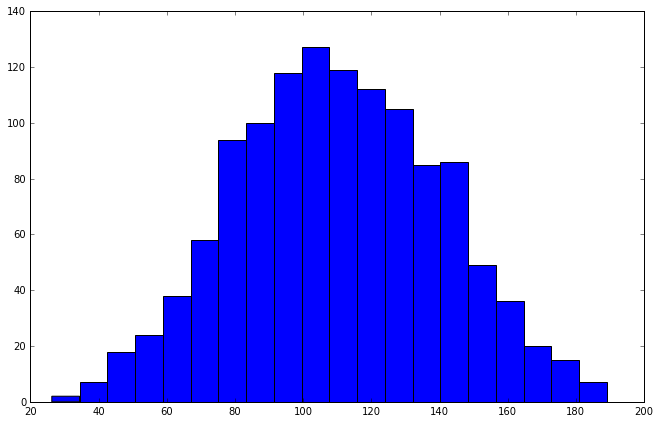

[   4.   12.   21.   25.   54.   63.  100.  113.  109.  121.  107.  118.
   97.   90.   68.   40.   38.   23.   12.    5.]


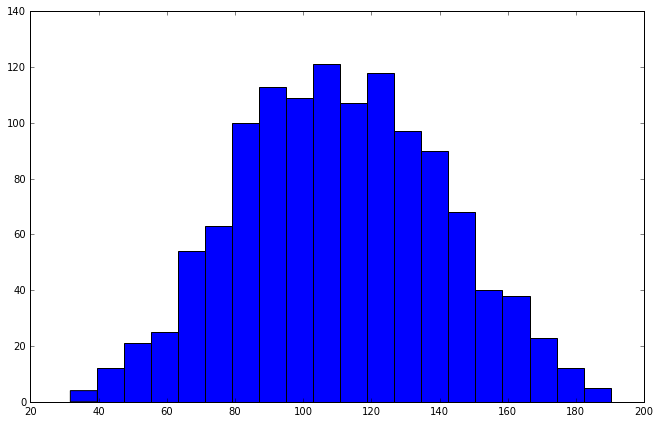

[   2.    5.   21.   28.   33.   52.   86.  107.  122.  104.  118.  135.
  120.  110.   55.   51.   37.   24.    6.    4.]


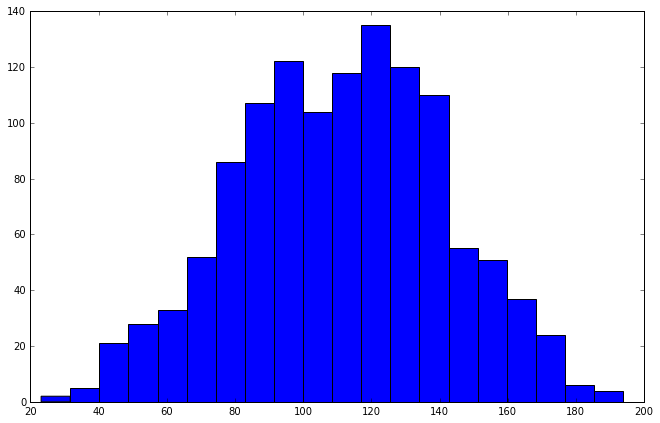

[   6.   13.   28.   31.   49.   75.   95.   98.  130.  105.  130.  114.
  107.   76.   76.   35.   29.   14.    6.    3.]


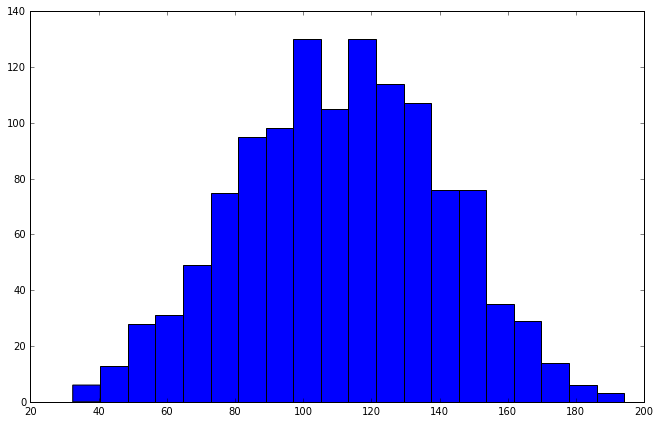

[   3.    7.   27.   25.   38.   69.  104.  109.  123.  124.   94.  121.
  102.   78.   73.   47.   39.   25.    7.    5.]


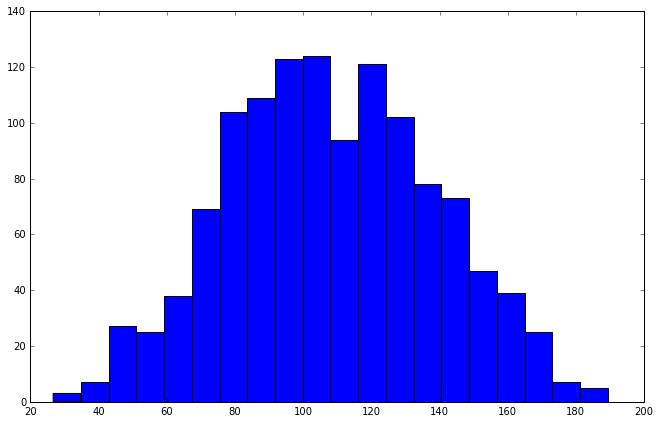

In [8]:
for s in samples:
    plt.figure(figsize=(11, 7))
    (n, bins, patches) = plt.hist(s.values, num_bins)
    print(n)
    plt.show()


# 1.3

In [9]:
import pandas as pd
import scipy.stats as st

d = {}

for i in range(len(samples)):
    s = samples[i]
    stat = {}
    stat[r'$\bar{x}$'] = s.mean()
    stat[r'$x_{med}$'] = s.median()
    stat[r'$x_{mid}$'] = s.mid()
    stat[r'$x_{mode}$'] = s.mode()
    stat[r'$s^2$'] = s.variance()
    stat[r'$s$'] = s.std()
    stat[r'$\hat{m}_3$'] = s.moment(3)
    stat[r'$\hat{m}_4$'] = s.moment(4)
    stat[r'$As$'] = s.skewness()
    stat[r'$Ex$'] = s.kurtosis()
    d[i] = pd.Series(stat)


In [10]:
keys = [r'$\bar{x}$', r'$x_{med}$', r'$x_{mid}$', r'$x_{mode}$', r'$s^2$', r'$s$',
        r'$\hat{m}_3$', r'$\hat{m}_4$', r'$As$', r'$Ex$']

df = pd.DataFrame(d, index=keys).transpose()
df

,$\bar{x}$,$x_{med}$,$x_{mid}$,$x_{mode}$,$s^2$,$s$,$\hat{m}_3$,$\hat{m}_4$,$As$,$Ex$
0,110.146511,110.0465,109.59490,101.0970,902.224343,30.037050,89.286287,2.078277e+06,0.003295,-0.446862
1,109.727726,109.0735,111.57240,88.4999,849.016090,29.137881,1742.432415,1.860464e+06,0.070434,-0.418991
2,110.102254,109.7755,111.29265,100.7780,907.398840,30.123062,983.996199,2.096894e+06,0.035999,-0.453287
3,110.202226,110.4890,110.98455,86.0643,905.391889,30.089731,-780.921056,2.182590e+06,-0.028665,-0.337443
4,110.565132,110.4235,110.41645,83.0177,924.334255,30.402866,-1103.041203,2.055183e+06,-0.039251,-0.594571
5,109.424896,109.6710,111.39270,44.0929,908.771092,30.145830,-574.193719,2.098820e+06,-0.020959,-0.458640
6,110.167936,109.3150,107.70935,126.3780,894.385864,29.906285,786.558053,2.061350e+06,0.029407,-0.423074
7,110.877664,110.2725,110.94180,103.0790,891.916171,29.864966,1244.466075,2.008403e+06,0.046719,-0.475341
8,110.895968,111.6750,108.51840,114.2740,932.938423,30.544041,-2178.081302,2.262944e+06,-0.076435,-0.400033
9,111.189666,112.1985,113.28730,100.7300,886.960663,29.781885,-810.374489,2.015049e+06,-0.030678,-0.438603


In [11]:
df.columns = ['x_avg', 'x_med', 'x_mid', 'x_mode', 's^2', 's', 'm_3', 'm_4', 'As', 'Ex']
df.to_csv('table.csv')

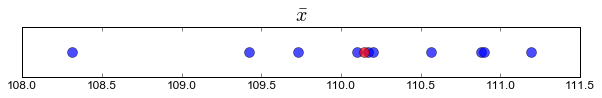

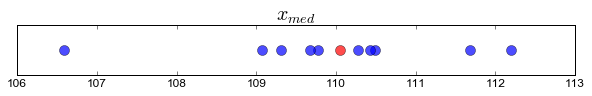

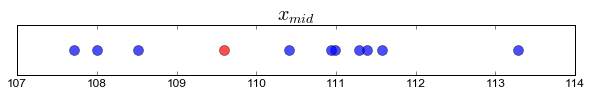

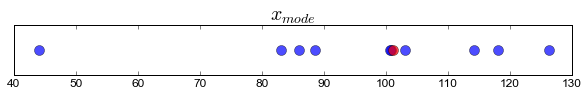

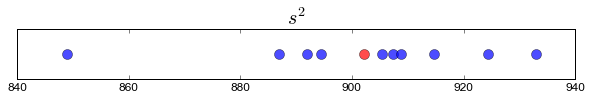

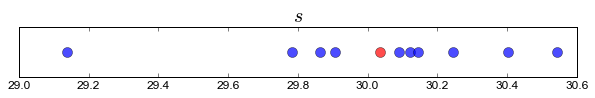

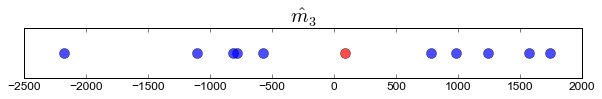

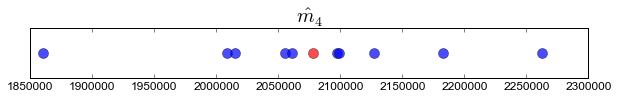

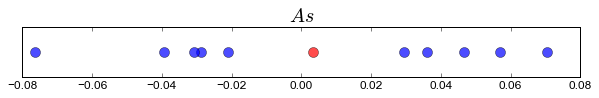

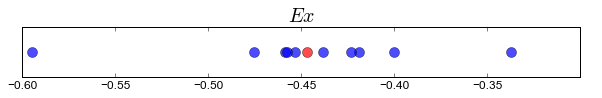

In [12]:
from matplotlib import rc

font = {'family': 'Arial', 'weight': 'normal'}
rc('font', **font)

size = len(d) - 1

for i in range(len(keys)):
    key = keys[i]
    y = np.zeros(size)
    plt.figure(figsize=(10, 10.5))
    plt.subplot(len(keys), 1, i+1)
    plt.title(key, fontsize=20)
    plt.plot([d[i][key] for i in range(1, size + 1)], y, marker='o', linestyle='None', alpha=0.7, markersize=10)
    plt.plot(d[0][key], 0, marker='o', color='r', alpha=0.7, markersize=10)
    plt.yticks([])
    plt.xticks(fontsize=12)

plt.show()

In [13]:
print(samples[0].percentile(2.5), end=' -- ')
print(samples[0].percentile(97.5))

51.46851 -- 167.7943


Получили границы интерквантильного промежутка:
$$J_{0.95} \approx [51, 168]$$

# 1.4

In [14]:
def find_s(values: list):
    c = st.tmean(values)
    res = 0
    for i in values:
        res += (i - c)
    return math.sqrt(1/(len(sample)-1)*res)

In [15]:
s_vals = []
for sample in samples:
    print(sample.interval_mean(0.8))
    
print('\n')

for sample in samples:
    print(sample.interval_variance(0.8))

(110.07415381530816, 110.21886785682298)
(109.50576266654119, 109.94968946460634)
(109.87278605841901, 110.33172246617117)
(109.97301135695166, 110.43143995452373)
(110.33353246424224, 110.79673179805289)
(109.19525408790139, 109.65453738750841)
(109.94011944729296, 110.39575317565784)
(110.65016215408505, 111.10516637050509)
(110.66329285772669, 111.12864304391265)
(110.96279643150349, 111.41653487997191)
(108.08125053238138, 108.54203012335634)


(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)


D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in double_scalars
D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars


In [22]:
st.chi.pdf(0.99, 100)

6.6142955776078835e-79

In [23]:
st.chi2?